In [14]:
%matplotlib inline

import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
barker13 = [+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1]
sum(barker13)

5

In [11]:
barker11 = [+1, +1, +1, -1, -1, -1, +1, -1, -1, +1, -1]
sum(barker11)

-1

In [5]:
barker7 = [+1, +1, +1, -1, -1, +1, -1]
sum(barker7)

1

# OpenStint preamble must have a good "selectivity" (low sidelobes)

preamble:  [1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1]


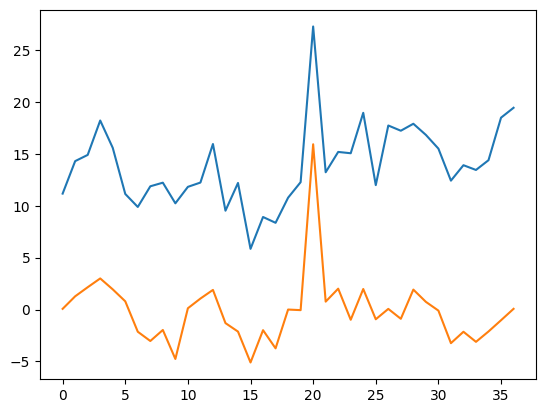

In [187]:
# preamble = barker11 + [+1, -1, +1, -1, +1] # original idea (not that great...)
# preamble = barker7 + list(reversed(barker7)) + [+1, -1]
preamble =  barker13 + [-1, -1, -1]

print("preamble: ", preamble)
assert(len(preamble) == 16)

noise = 1.0
worst_case = np.zeros(52-16+1)
avg_case = np.zeros(52-16+1)

for _ in range(1000):
    randsymbols = [random.randint(0,1)*2-1 for _ in range(16)]
    test_stream = np.array([0,]*16 + [-1,]*4 + preamble + randsymbols, dtype=np.float64)
    test_stream += np.random.normal(0, noise, len(test_stream))
    result = np.convolve(test_stream, list(reversed(preamble)), 'valid')
    worst_case = np.maximum(worst_case, result)
    avg_case += result/1000.0

plt.plot(worst_case)
plt.plot(avg_case)

# OpenStint preamble must be sufficiently different from RC3/RC4 preambles

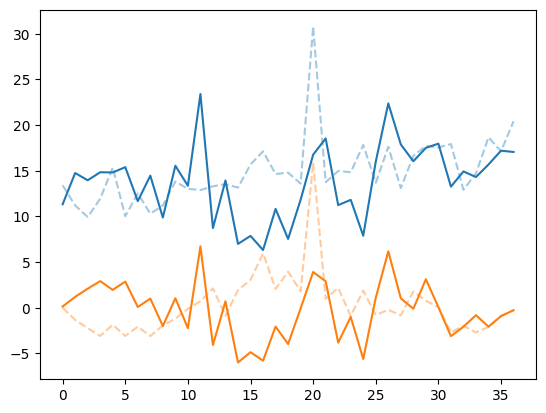

In [185]:
rc3_preamble = [-1, +1, -1, +1, -1, -1, -1, +1, +1, +1, +1, -1, -1, +1, -1, -1]

worst_case_amb = np.zeros(52-16+1)
avg_case_amb = np.zeros(52-16+1)

for _ in range(1000):
    randsymbols = [random.randint(0,1)*2-1 for _ in range(16)]
    test_stream = np.array([0,]*16 + [-1,]*4 + rc3_preamble + randsymbols, dtype=np.float64)
    test_stream += np.random.normal(0, noise, len(test_stream))
    result = np.convolve(test_stream, list(reversed(preamble)), 'valid')
    worst_case_amb = np.maximum(worst_case_amb, result)
    avg_case_amb += result/1000.0

plt.plot(worst_case, c="C0", alpha=0.4, linestyle='dashed')
plt.plot(worst_case_amb, c="C0")
plt.plot(avg_case, c="C1", alpha=0.4, linestyle='dashed')
plt.plot(avg_case_amb, c="C1")

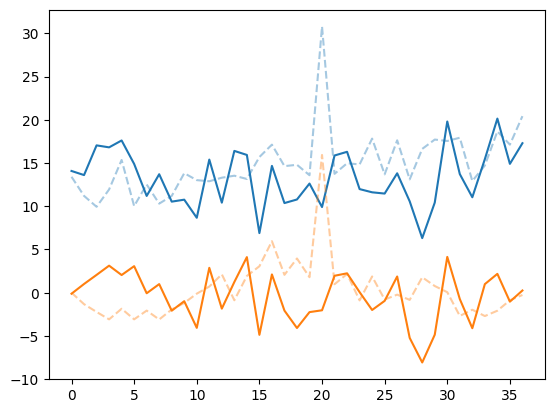

In [186]:
# post-dpsk: 7E055
rc4_preamble = [-1, +1, -1, +1,  +1, -1, +1, -1,  -1, -1, -1, -1,  -1, +1, +1, -1,  -1, +1, +1, -1]

worst_case_amb = np.zeros(52-16+1)
avg_case_amb = np.zeros(52-16+1)

for _ in range(1000):
    randsymbols = [random.randint(0,1)*2-1 for _ in range(12)]
    test_stream = np.array([0,]*16 + [-1,]*4 + rc4_preamble + randsymbols, dtype=np.float64)
    test_stream += np.random.normal(0, noise, len(test_stream))
    result = np.convolve(test_stream, list(reversed(preamble)), 'valid')
    worst_case_amb = np.maximum(worst_case_amb, result)
    avg_case_amb += result/1000.0

plt.plot(worst_case, c="C0", alpha=0.4, linestyle='dashed')
plt.plot(worst_case_amb, c="C0")
plt.plot(avg_case, c="C1", alpha=0.4, linestyle='dashed')
plt.plot(avg_case_amb, c="C1")